<a href="https://colab.research.google.com/github/Hanton-MENEZ/BigData/blob/main/DataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

import pathlib

#vars
batch_size=32
image_width=180
image_height=180
epochs = 10

In [ ]:
dataset_url = "https://yr2yaq.am.files.1drv.com/y4mxAoGp_FhXB9mLrGv34n-XHVLSxEelJnhqJXmzVGUeM1Scl6AI32ulFspRRJ-2WtLVGW25JYsDV1v1j_vPceeu9wpwAhxfb3rL-IBf6PChh-qhCuLBHXY5rGXrvsry97HR0ZQZI2vhHW6ltswCz_w_w1yrE4y-K0LycvfuN9N78NDAZdAeZ_dGwvYqb2TBS6I37iKG52O2q4LokC4SJJgzg"
data_dir = keras.utils.get_file('dataset_dl', origin=dataset_url, extract=True, archive_format="zip", cache_dir=".")
data_dir = pathlib.Path(data_dir)

data_dir = pathlib.Path("datasets/Livrable 1")

# création du dossier dataset_remodeled
path = os.path.join("dataset_remodeled")
if not os.path.exists(path):
    os.mkdir(path)
    # création des dossiers Photo et NoPhoto
    path = os.path.join("dataset_remodeled", "Photo")
    if not os.path.exists(path):
        os.mkdir(path)
        path = os.path.join("dataset_remodeled", "NoPhoto")
        if not os.path.exists(path):
            os.mkdir(path)

7828640628/7828640628 [==============================] - 349s 0us/step


In [ ]:
# Copie de dataset_origin/Photo a dataset_remodeled/Photo
path = os.path.join(data_dir, "Photo")

for file in os.listdir(path):
    file_path = os.path.join(path, file)
    if os.path.isfile(file_path):
      os.replace(file_path, os.path.join("dataset_remodeled", "Photo", file))

# Copie de dataset_origin/Painting a dataset_remodeled/NoPhoto
path = os.path.join(data_dir, "Painting")
for file in os.listdir(path):
  file_path = os.path.join(path, file)
  if os.path.isfile(file_path):
    os.replace(file_path, os.path.join("dataset_remodeled", "NoPhoto", file))

# Copie de dataset_origin/Schematics a dataset_remodeled/NoPhoto
path = os.path.join(data_dir, "Schematics")
for file in os.listdir(path):
  file_path = os.path.join(path, file)
  if os.path.isfile(file_path):
    os.replace(file_path, os.path.join("dataset_remodeled", "NoPhoto", file))

# Copie de dataset_origin/Sketch a dataset_remodeled/NoPhoto
path = os.path.join(data_dir, "Sketch")
for file in os.listdir(path):
  file_path = os.path.join(path, file)
  if os.path.isfile(file_path):
    os.replace(file_path, os.path.join("dataset_remodeled", "NoPhoto", file))

# Copie de dataset_origin/Text a dataset_remodeled/NoPhoto
path = os.path.join(data_dir, "Text")
for file in os.listdir(path):
  file_path = os.path.join(path, file)
  if os.path.isfile(file_path):
    os.replace(file_path, os.path.join("dataset_remodeled", "NoPhoto", file))

In [ ]:
main_directory = os.path.join("dataset_remodeled")

# Création du dataset pour l'ensemble d'entrainement (80% des données)
train_set, test_set = tf.keras.preprocessing.image_dataset_from_directory(
main_directory,
batch_size=batch_size,  # Taille du batch
image_size=(image_width, image_height),  # Redimensionnement des images si nécessaire
validation_split=0.2,  # Fraction des données à utiliser pour la validation
subset='both',  # Indique l'utilisation de données pour l'entraînement
color_mode='rgb',
seed=255
)

Found 41407 files belonging to 2 classes.
Using 33126 files for training.
Using 8281 files for validation.


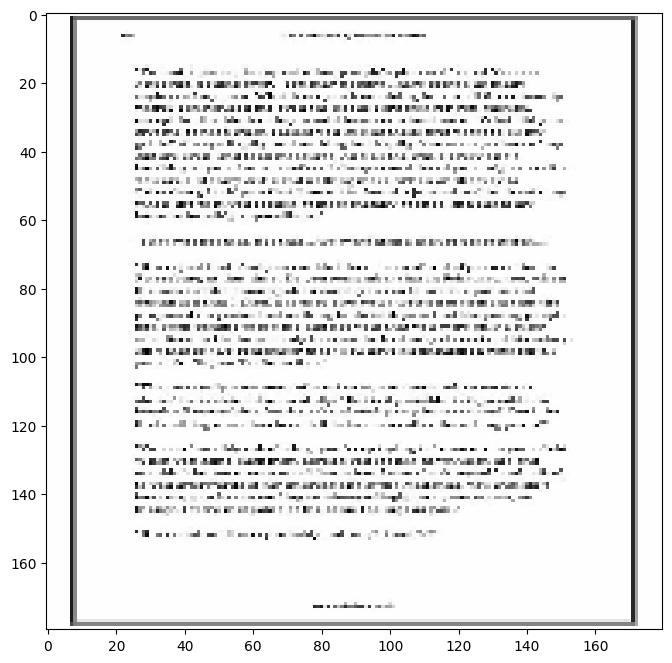

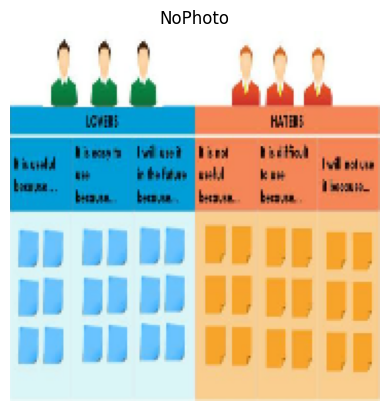

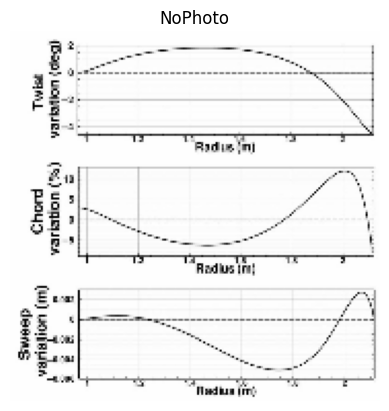

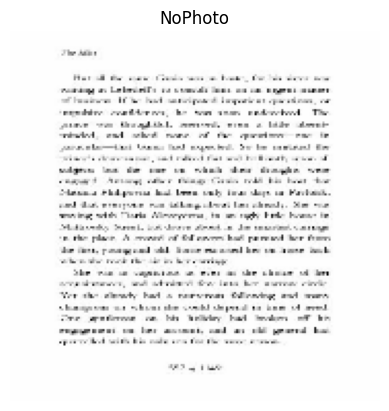

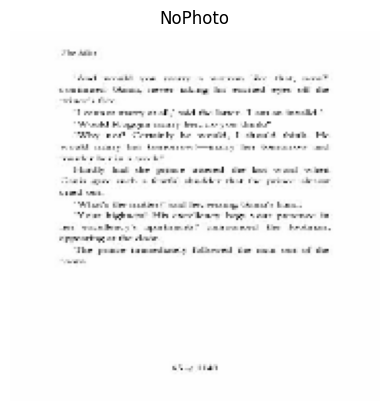

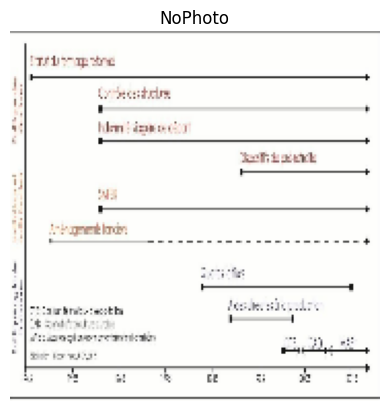

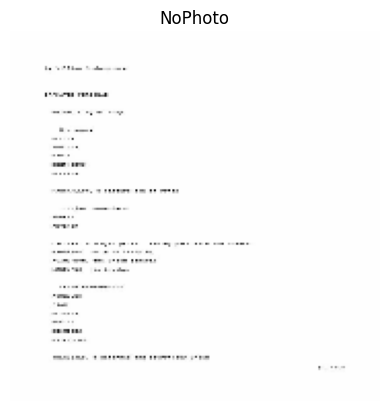

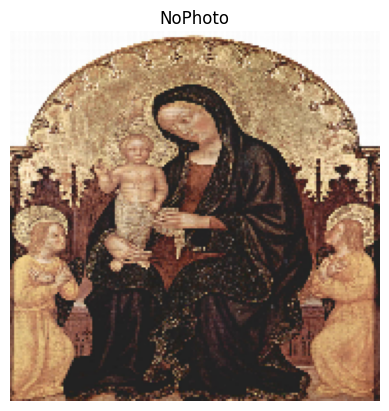

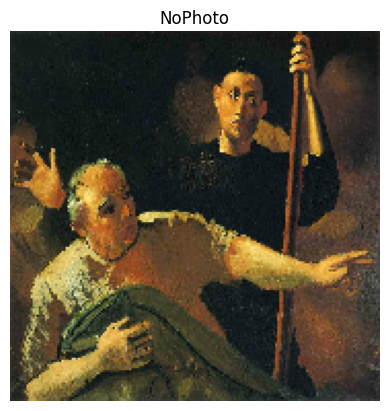

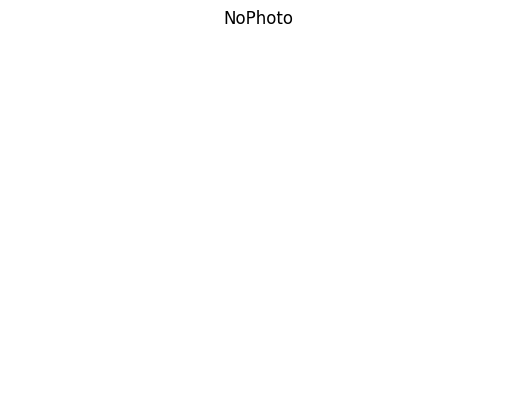

In [ ]:
#verification des images obtenues
plt.figure(figsize=(8, 8))
for images, labels in train_set.take(1):
    for i in range(9):
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.show()
      plt.title(train_set.class_names[labels[i]])
      plt.axis("off")

In [ ]:
# Création d'un modèle séquentiel
model = Sequential()

# Normalisation des pixels
model.add(layers.experimental.preprocessing.Rescaling(scale=1./255, input_shape=(image_width, image_height, 3)))

# Ajout des couches Convolutional et de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_width, image_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplatir les données pour les passer à travers des couches entièrement connectées
model.add(Flatten())
model.add(Dropout(0.5))

# Ajout de couches entièrement connectées (Dense)
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation="sigmoid"))

# Compilation du modèle
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_set, epochs=epochs, validation_data=test_set)

Epoch 1/10
1036/1036 [==============================] - 246s 229ms/step - loss: 0.3586 - accuracy: 0.8047 - val_loss: 0.3007 - val_accuracy: 0.8573
Epoch 2/10
1036/1036 [==============================] - 238s 228ms/step - loss: 0.2771 - accuracy: 0.8689 - val_loss: 0.2558 - val_accuracy: 0.8897
Epoch 3/10
1036/1036 [==============================] - 274s 263ms/step - loss: 0.2295 - accuracy: 0.8987 - val_loss: 0.2374 - val_accuracy: 0.9035
Epoch 4/10
1036/1036 [==============================] - 241s 232ms/step - loss: 0.1988 - accuracy: 0.9164 - val_loss: 0.2633 - val_accuracy: 0.9012
Epoch 5/10
1036/1036 [==============================] - 241s 232ms/step - loss: 0.1682 - accuracy: 0.9312 - val_loss: 0.2564 - val_accuracy: 0.9087
Epoch 6/10
1036/1036 [==============================] - 242s 232ms/step - loss: 0.1409 - accuracy: 0.9417 - val_loss: 0.2304 - val_accuracy: 0.9126
Epoch 7/10
1036/1036 [==============================] - 241s 232ms/step - loss: 0.1130 - accuracy: 0.9560 - val_

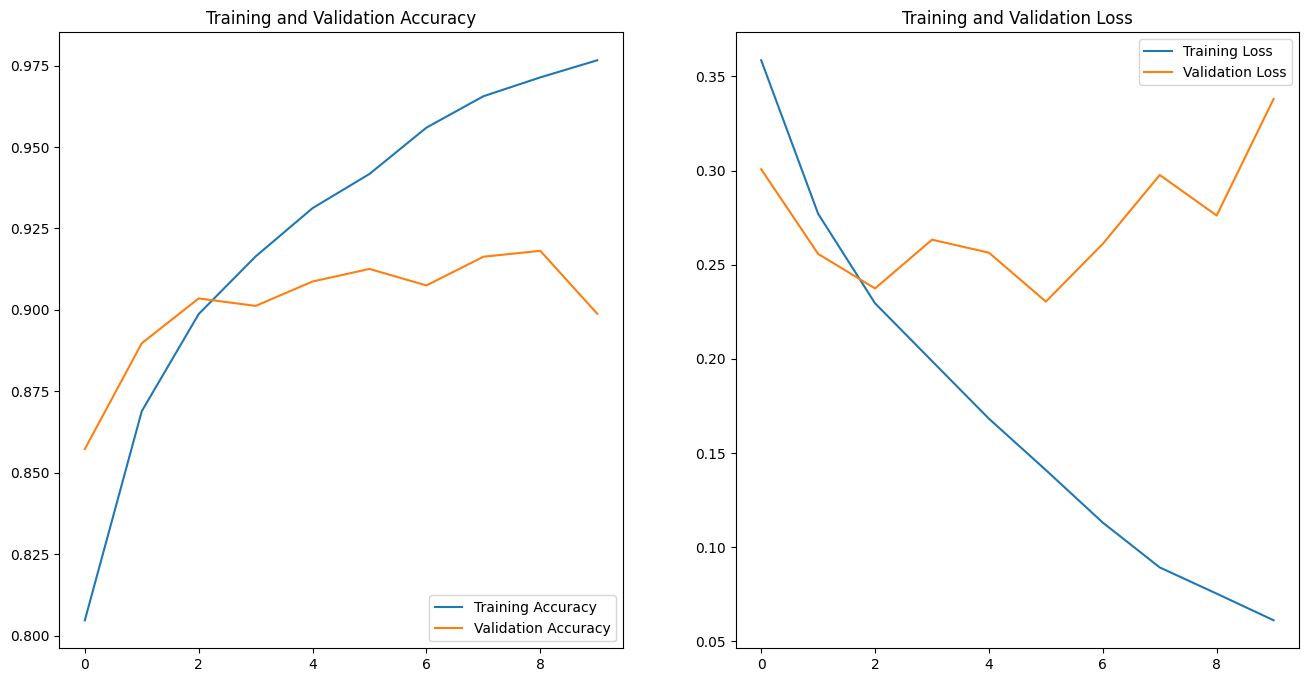

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

259/259 [==============================] - 39s 150ms/step


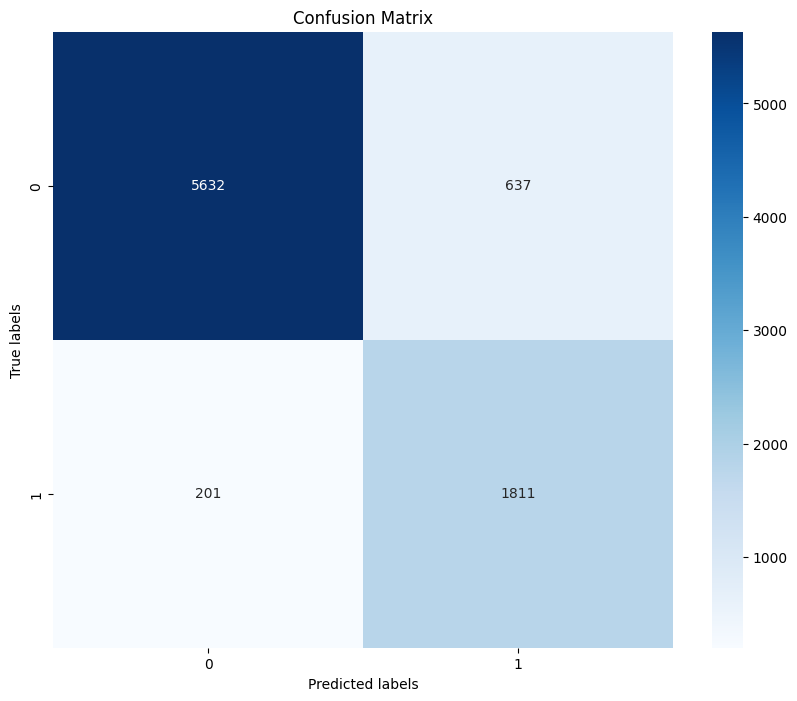

Précision: 0.7398
Rappel: 0.9001
F1 Score: 0.8121
Exactitude: 0.8988


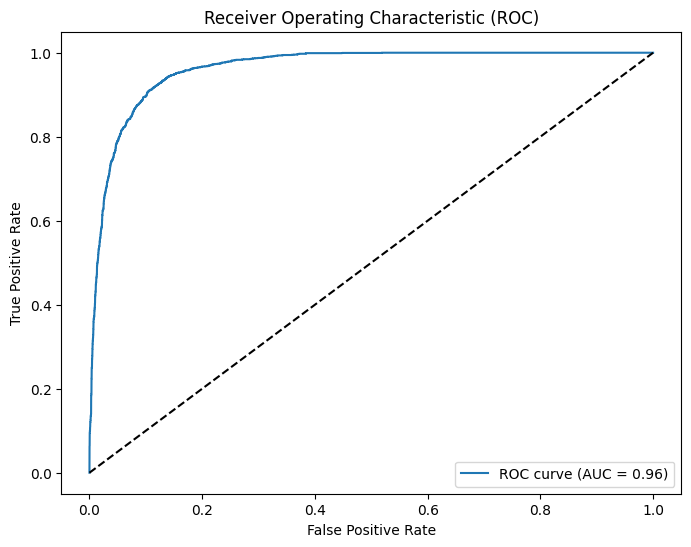

In [ ]:
# Charger les prédictions et les étiquettes réelles
y_pred_prob = model.predict(test_set)
y_true = np.concatenate([y.numpy() for _, y in test_set], axis=0)

# Convertir les probabilités en prédictions binaires
y_pred_binary = y_pred_prob.round()

# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred_binary)

# Afficher la matrice de confusion
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculer les métriques
precision = precision_score(y_true, y_pred_binary)
recall = recall_score(y_true, y_pred_binary)
f1 = f1_score(y_true, y_pred_binary)
accuracy = accuracy_score(y_true, y_pred_binary)

# Afficher les métriques
print(f'Précision: {precision:.4f}')
print(f'Rappel: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Exactitude: {accuracy:.4f}')

# Calculer la courbe ROC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Afficher la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Ligne en diagonale (référence)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()